<a href="https://colab.research.google.com/github/LifeofAGeek/100-days-of-Applied-AI/blob/master/DIP_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Anubhav Sethi**

**1.  Find the phase angle of an image.**



---






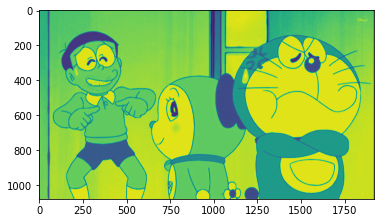

In [39]:
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('/input.png', cv2.IMREAD_GRAYSCALE)
imgplot = plt.imshow(img)
plt.show()

def compute_mag_phase(toBeTransfromed):
    dft = np.fft.fft2(toBeTransfromed)
    dft_shift = np.fft.fftshift(dft)
    mag = np.abs(dft_shift)
    ang = np.angle(dft_shift)
    return mag, ang

**2. Multiply the output of phase angle with some number, take from user.**


---





In [40]:
Multiply_by = int(input("Enter some number: "))

Enter some number: 10


**3. Reconstruct the image using inverse Fourier transform .**



---



In [41]:
# Inverse FFT
def reconstruct(mag,ang):
    combined = np.multiply(mag, np.exp(1j*ang))
    fftx = np.fft.ifftshift(combined)
    ffty = np.fft.ifft2(fftx)
    imgCombined = np.abs(ffty)
    return imgCombined

In [42]:
magnitude , angle = compute_mag_phase(img)
print(magnitude," ",angle)

[[327.          99.56537765 422.29631554 ... 123.24054246 422.29631554
   99.56537765]
 [242.25775072 382.13350348 312.05699267 ... 442.68478775  63.36739247
  225.06934648]
 [668.47140784 204.6922684  287.34509775 ... 663.24797944 459.53675448
  198.40350696]
 ...
 [204.69650562 389.78335876 306.84763743 ... 175.52810191 887.32742085
  201.60073841]
 [668.47140784 198.40350696 459.53675448 ... 476.1843396  287.34509775
  204.6922684 ]
 [242.25775072 225.06934648  63.36739247 ... 327.31253216 312.05699267
  382.13350348]]   [[-3.14159265 -1.6563709   1.131648   ...  2.08069729 -1.131648
   1.6563709 ]
 [-0.61148763 -0.65642236  1.05189566 ... -1.77433459 -2.55262077
  -0.03026103]
 [-0.94075423 -0.4377749   1.61526027 ... -1.79532049 -3.07984269
  -0.77530144]
 ...
 [ 2.27292666  0.56509361  0.29522956 ... -2.47075001  0.31326857
   0.93375977]
 [ 0.94075423  0.77530144  3.07984269 ... -0.22650663 -1.61526027
   0.4377749 ]
 [ 0.61148763  0.03026103  2.55262077 ...  0.4004109  -1.05189

In [43]:
# multiplying the Phase by the user input
New_Image = reconstruct(magnitude, angle*Multiply_by)

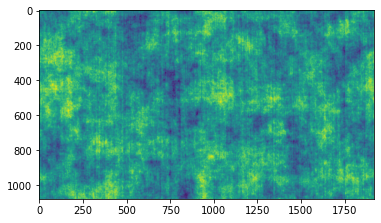

In [44]:
imgplot = plt.imshow(New_Image) # after inverse FFT
plt.show()